In [2]:
!pip install gdown
!pip install pandas
!pip install opencv-python
!pip install matplotlib
!pip install imgaug
!pip install scikit-learn
!pip install prettytable
!pip install numba
!pip install seaborn
!pip install openpyxl

  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.5-py3-none-any.whl (36 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbconvert 7.8.0 requires bleach!=5.0.0, which is not installed.
nbconvert 7.8.0 requires defusedxml, which is not installed.
nbconvert 7.8.0 requires jupyterlab-pygments, which is not installed.
nbconvert 7.8.0 requires nbclient>=0.5.0, which is not installed.
nbconvert 7.8.0 requires pandocfilters>=1.4.1, which is not installed.
nbconvert 7.8.0 requires tinycss2, which is not installed.


   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ----- ---------------------------------- 122.9/948.0 kB 2.4 MB/s eta 0:00:01
   ----------------- ---------------------- 409.6/948.0 kB 5.1 MB/s eta 0:00:01
   ------------------------------------ --- 860.2/948.0 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 948.0/948.0 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/12.9 MB 6.8 MB/s eta 0:00:02
   - -------------------------------------- 0.5/12.9 MB 5.3 MB/s eta 0:00:03
   - -------------------------------------- 0.6/12.9 MB 4.7 MB/s eta 0:00:03
   - -------------------------------------- 0.6/12.9 MB 4.7 MB/s eta 0:00:03
   - -------------------------------------- 0.6/12.9 MB 4.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/12.9 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 1.0/12.9 MB 2.9 MB/s eta 0:00:05


   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB 435.7 kB/s eta 0:00:34
   ---------------------------------------- 0.1/14.7 MB 544.7 kB/s eta 0:00:27
    --------------------------------------- 0.3/14.7 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.6/14.7 MB 2.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/14.7 MB 3.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/14.7 MB 4.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/14.7 MB 4.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.5/14.7 MB 4.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.7/14.7 MB 4.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.9/14.7 MB 4.0 MB/s eta 0:00:04
   ----- ---------------------------------- 2.0/14.7 MB 4.1 MB/s eta 0:00:04
   ------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xai 0.1.0 requires matplotlib<3.4.3, but you have matplotlib 3.8.4 which is incompatible.
xai 0.1.0 requires numpy<1.21.3, but you have numpy 1.23.5 which is incompatible.
xai 0.1.0 requires pandas<1.3.4, but you have pandas 2.2.2 which is incompatible.
xai 0.1.0 requires scikit-learn<1.0.1, but you have scikit-learn 1.4.2 which is incompatible.
xai 0.1.0 requires scipy<1.7.1, but you have scipy 1.13.0 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import glob
import cv2
import os
import json
import glob
import time
import datetime
import threading
from tqdm import tqdm
from imgaug import augmenters
import zipfile
import seaborn as sns
from PIL import Image
from collections import Counter
from concurrent import futures
from prettytable import PrettyTable
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Using all images that were processed by YoLo Model

In [3]:
with zipfile.ZipFile("/workspace/Train_Test_CVX_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/workspace/train")

In [4]:
base_dir = os.path.join('/workspace/train/Train_Test_CVX_Dataset/train')
type1_dir = os.path.join(base_dir,'Type_1')
type2_dir = os.path.join(base_dir,'Type_2')
type3_dir = os.path.join(base_dir,'Type_3')

type1_files = glob.glob(type1_dir+'/*.jpg')
type2_files = glob.glob(type2_dir+'/*.jpg')
type3_files = glob.glob(type3_dir+'/*.jpg')

len(type1_files),len(type2_files),len(type3_files)

(789, 3729, 2073)

In [5]:
test_base_dir = os.path.join('/workspace/train/Train_Test_CVX_Dataset/test')
type1_test_dir = os.path.join(test_base_dir,'Type_1_Cropped')
type2_test_dir = os.path.join(test_base_dir,'Type_2_Cropped')
type3_test_dir = os.path.join(test_base_dir,'Type_3_Cropped')

type1_test_files = glob.glob(type1_test_dir+'/*.jpg')
type2_test_files = glob.glob(type2_test_dir+'/*.jpg')
type3_test_files = glob.glob(type3_test_dir+'/*.jpg')

len(type1_test_files),len(type2_test_files),len(type3_test_files)

(86, 374, 222)

In [6]:
#Building a dataframe mapping train images and Cancer type
np.random.seed(42)

files_df = pd.DataFrame({
    'filename': type1_files + type2_files + type3_files,
    'label': ['Type_1'] * len(type1_files) + ['Type_2'] * len(type2_files) + ['Type_3'] * len(type3_files)
}).sample(frac=1, random_state=42).reset_index(drop=True)

files_df.head()


#Building a dataframe mapping test images and Cancer type
np.random.seed(42)

test_files_df = pd.DataFrame({
    'filename': type1_test_files + type2_test_files + type3_test_files,
    'label': ['Type_1'] * len(type1_test_files) + ['Type_2'] * len(type2_test_files) + ['Type_3'] * len(type3_test_files)
}).sample(frac=1, random_state=42).reset_index(drop=True)


In [7]:
files_df.label.value_counts()

label
Type_2    3729
Type_3    2073
Type_1     789
Name: count, dtype: int64

## Data Augmentation

In [8]:
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.20),
    tf.keras.layers.RandomZoom(0.15),
])


2024-04-21 21:44:23.231310: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43607 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:57:00.0, compute capability: 8.6


## Preprocessing

In [9]:
data_array = []
data_labels = []
IMG_DIMS = (224, 224)

for i in tqdm(range(len(files_df))):
    img_path = files_df['filename'][i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, dsize=IMG_DIMS,
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    data_array.append(img)
    data_labels.append(files_df['label'][i])


100%|██████████| 6591/6591 [00:32<00:00, 201.36it/s]


In [10]:
data_array = np.array(data_array)
data_labels = np.array(data_labels)

In [11]:
idx_Type_1 = np.where(data_labels=="Type_1")[0]
idx_Type_2 = np.where(data_labels=="Type_2")[0]
idx_Type_3 = np.where(data_labels=="Type_3")[0]

In [12]:
# Augmenting type 1 and type 3. Type 2 has sufficent datapoints and so skipping it
augmented_images_type1 = data_augmentation(data_array[idx_Type_1])
augmented_images_type3 = data_augmentation(data_array[idx_Type_3][:1750])

2024-04-21 21:45:05.295981: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [13]:
# Appending Type 1 Augmented Images and Labels
data_array = np.concatenate((data_array,augmented_images_type1))
data_labels = np.concatenate((data_labels,np.array(["Type_1"]*len(augmented_images_type1))))

In [14]:
len(data_labels)

7380

In [15]:
# Appending Type 2 Augmented Images and Labels
data_array = np.concatenate((data_array,augmented_images_type3))
data_labels = np.concatenate((data_labels,np.array(["Type_3"]*len(augmented_images_type3))))

In [16]:
data_array.shape

(9130, 224, 224, 3)

In [17]:
len(data_labels)

9130

In [18]:
pd.Series(data_labels).value_counts()

Type_3    3823
Type_2    3729
Type_1    1578
Name: count, dtype: int64

# Splitting dataset for train

In [19]:
#split training,dev set : 80:10:10

train_files, val_files, train_labels, val_labels = train_test_split(data_array,
                                                                      data_labels,
                                                                      test_size=0.10, random_state=42,stratify=data_labels)

print(train_files.shape, val_files.shape)
print('Train:', Counter(train_labels), '\nVal:', Counter(val_labels))

(8217, 224, 224, 3) (913, 224, 224, 3)
Train: Counter({'Type_3': 3441, 'Type_2': 3356, 'Type_1': 1420}) 
Val: Counter({'Type_3': 382, 'Type_2': 373, 'Type_1': 158})


In [20]:
test_array = []
test_labels = []
IMG_DIMS = (224, 224)

for i in tqdm(range(len(test_files_df))):
    img_path = test_files_df['filename'][i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, dsize=IMG_DIMS,
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    test_array.append(img)
    test_labels.append(test_files_df['label'][i])

#scaling the test set and one-hot encoding the test labels
test_labels= np.array(test_labels)
test_imgs_scaled = np.array(test_array) / 255.
test_imgs_scaled.shape, test_labels.shape

le = LabelEncoder()
le.fit(test_labels)
test_labels_enc = le.transform(test_labels)

test_labels_1hotenc = to_categorical(test_labels_enc, num_classes=3)


print(test_labels[:6], test_labels_enc[:6])
print(test_labels[:6], test_labels_1hotenc[:6])

100%|██████████| 682/682 [00:05<00:00, 118.64it/s]


['Type_2' 'Type_2' 'Type_2' 'Type_2' 'Type_2' 'Type_2'] [1 1 1 1 1 1]
['Type_2' 'Type_2' 'Type_2' 'Type_2' 'Type_2' 'Type_2'] [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


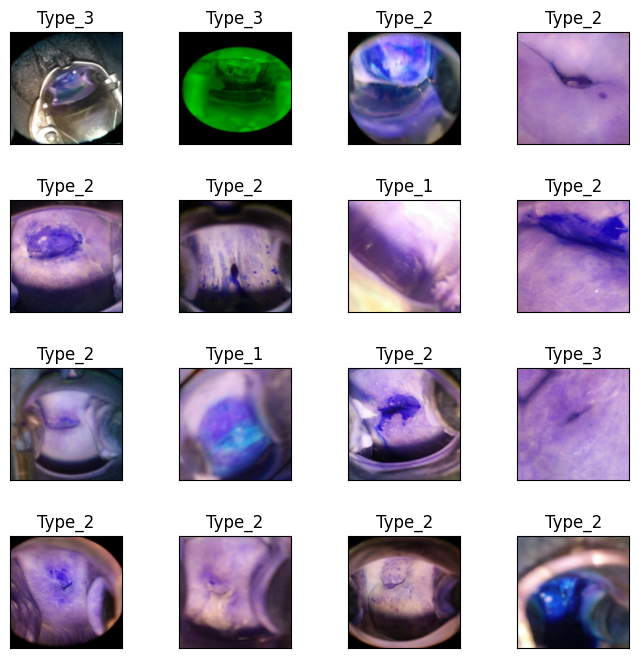

In [21]:
plt.figure(1 , figsize = (8 , 8))
n = 0
for i in range(16):
    n += 1
    r = np.random.randint(0 , train_files.shape[0] , 1)
    plt.subplot(4 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(train_files[r[0]]/255.)
    plt.title('{}'.format(train_labels[r[0]]))
    plt.xticks([]) , plt.yticks([])

In [22]:
#encode text categories with labels
BATCH_SIZE = 64
NUM_CLASSES = 3
EPOCHS = 50
INPUT_SHAPE = (224, 224, 3)

train_imgs_scaled = train_files  / 255.
val_imgs_scaled = val_files  / 255.

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
val_labels_enc = le.transform(val_labels)

train_labels_1hotenc = to_categorical(train_labels_enc, num_classes=3)
val_labels_1hotenc = to_categorical(val_labels_enc, num_classes=3)

print(train_labels[:6], train_labels_enc[:6])
print(train_labels[:6], train_labels_1hotenc[:6])

['Type_1' 'Type_1' 'Type_3' 'Type_1' 'Type_3' 'Type_2'] [0 0 2 0 2 1]
['Type_1' 'Type_1' 'Type_3' 'Type_1' 'Type_3' 'Type_2'] [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


# Training

## Densenet

In [24]:
# Load DenseNet201 with pre-trained weights
densenetNet = tf.keras.applications.DenseNet201(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)

# Freeze only some layers and unfreeze the rest
for layer in densenetNet.layers[:-10]:
    layer.trainable = False

# Define the rest of your model architecture with reduced complexity and added regularization
base_densenet = densenetNet
base_out_densenet = base_densenet.output
pool_out_densenet = tf.keras.layers.GlobalAveragePooling2D()(base_out_densenet)
hidden1_densenet = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(pool_out_densenet)  # Added L2 regularization
batch_norm1_densenet = tf.keras.layers.BatchNormalization()(hidden1_densenet)
drop1_densenet = tf.keras.layers.Dropout(rate=0.5)(batch_norm1_densenet)  # Increased dropout rate
hidden2_densenet = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(drop1_densenet)  # Added L2 regularization and reduced units
batch_norm2_densenet = tf.keras.layers.BatchNormalization()(hidden2_densenet)
drop2_densenet = tf.keras.layers.Dropout(rate=0.5)(batch_norm2_densenet)  # Increased dropout rate
out_densenet = tf.keras.layers.Dense(3, activation='softmax')(drop2_densenet)

# Define the model
densenet_model = tf.keras.Model(inputs=base_densenet.input, outputs=out_densenet)

# Learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001, decay_steps=1000, decay_rate=0.9)

# Compile the model with learning rate scheduling and L2 regularization
densenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),  
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [25]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", monitor='val_loss', 
                                                         save_best_only=True, mode='min')

densenet_history = densenet_model.fit(x=train_imgs_scaled, y=train_labels_1hotenc,
                                      batch_size=BATCH_SIZE,
                                      epochs=EPOCHS,
                                      validation_data=(val_imgs_scaled, val_labels_1hotenc),
                                      verbose=1,
                                      callbacks=[checkpoint_callback])
                                    

Epoch 1/50


2024-04-21 21:46:46.529754: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2024-04-21 21:46:46.651647: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-21 21:46:52.002315: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe59442d8c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-21 21:46:52.002338: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2024-04-21 21:46:52.007482: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-21 21:46:52.144736: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


129/129 [==============================] - ETA: 0s - loss: 2.5655 - accuracy: 0.4695

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/129 [==============================] - 43s 198ms/step - loss: 2.5655 - accuracy: 0.4695 - val_loss: 1.7347 - val_accuracy: 0.6583
Epoch 2/50
129/129 [==============================] - 19s 145ms/step - loss: 2.0376 - accuracy: 0.5722 - val_loss: 1.5031 - val_accuracy: 0.7076
Epoch 3/50
129/129 [==============================] - 17s 130ms/step - loss: 1.7910 - accuracy: 0.6386 - val_loss: 1.3640 - val_accuracy: 0.7623
Epoch 4/50
129/129 [==============================] - 17s 129ms/step - loss: 1.6185 - accuracy: 0.6746 - val_loss: 1.2905 - val_accuracy: 0.7733
Epoch 5/50
129/129 [==============================] - 19s 145ms/step - loss: 1.4813 - accuracy: 0.7139 - val_loss: 1.2596 - val_accuracy: 0.7777
Epoch 6/50
129/129 [==============================] - 15s 120ms/step - loss: 1.3808 - accuracy: 0.7527 - val_loss: 1.2666 - val_accuracy: 0.7700
Epoch 7/50
129/129 [==============================] - 17s 132ms/step - loss: 1.2605 - accuracy: 0.7880 - val_loss: 1.1970 - val_accuracy: 0.8

In [37]:
# Evaluation
densenet_model_accuracy = densenet_history.history['accuracy'][np.argmin(densenet_history.history['loss'])]
densenet_model_score = densenet_model.evaluate(test_imgs_scaled, test_labels_1hotenc)

# Printing summary
densenet_Summary = PrettyTable(["DenseNet"," "])
densenet_Summary.add_row(["Model Accuracy in %", "{:.2f}".format(densenet_model_accuracy*100)])
densenet_Summary.add_row(["Test Accuracy in %", "{:.2f}".format(densenet_model_score[1]*100)])
densenet_Summary.add_row(["Test Loss in %", "{:.2f}".format(densenet_model_score[0])])
print(densenet_Summary)

22/22 [==============================] - 1s 61ms/step - loss: 1.0846 - accuracy: 0.8944
+---------------------+-------+
|       DenseNet      |       |
+---------------------+-------+
| Model Accuracy in % | 99.87 |
|  Test Accuracy in % | 89.44 |
|    Test Loss in %   |  1.08 |
+---------------------+-------+


22/22 [==============================] - 4s 52ms/step


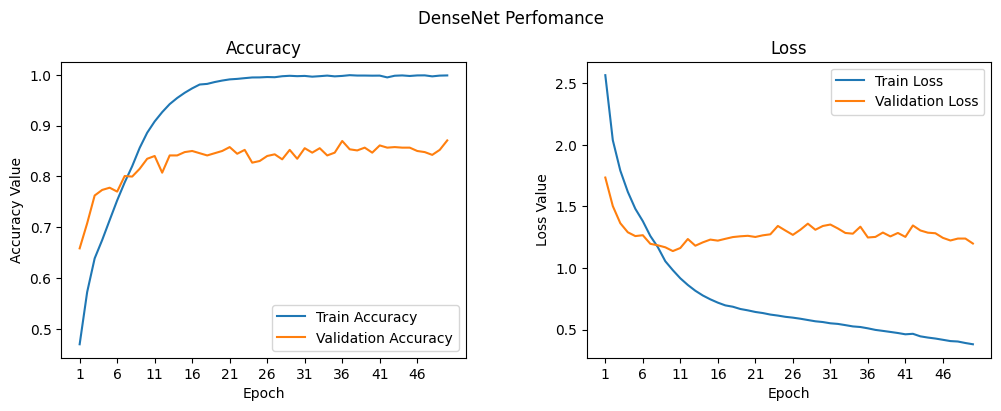

In [27]:
# Plotting performance
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('DenseNet Perfomance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(densenet_history.history['accuracy']) + 1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, densenet_history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, densenet_history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, densenet_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, densenet_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Predictions and Confusion Matrix
predictions_densenet = densenet_model.predict(test_imgs_scaled)
predicted_labels_densenet = np.argmax(predictions_densenet, axis=1)
true_labels_densenet = np.argmax(test_labels_1hotenc, axis=1)
conf_mat_densenet = confusion_matrix(true_labels_densenet, predicted_labels_densenet)


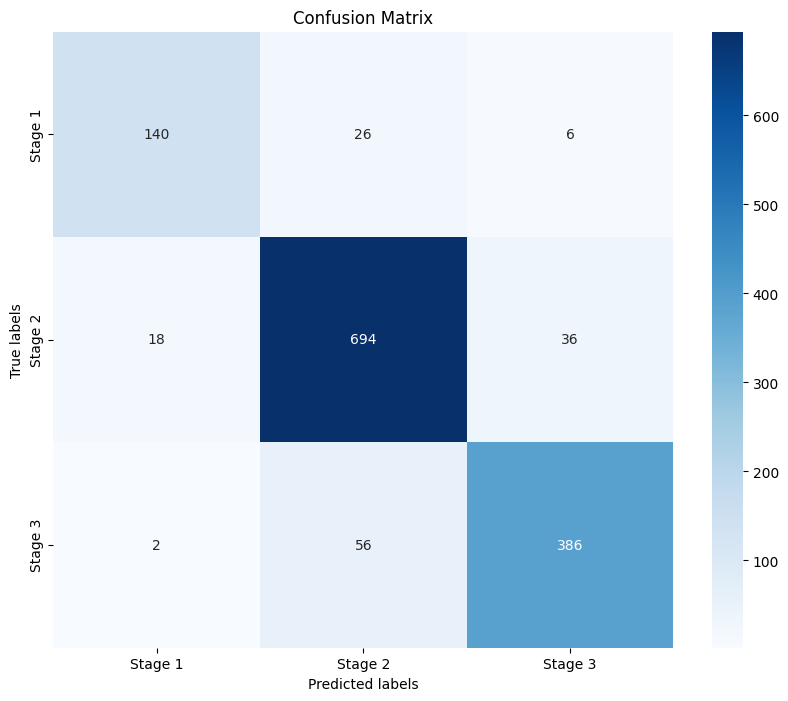

In [28]:
# Compute confusion matrix
conf_mat = confusion_matrix(true_labels_densenet, predicted_labels_densenet)
class_names = ['Stage 1', 'Stage 2', 'Stage 3'] 
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
class_report = classification_report(true_labels_densenet, predicted_labels_densenet, target_names=class_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Stage 1       0.88      0.81      0.84       172
     Stage 2       0.89      0.93      0.91       748
     Stage 3       0.90      0.87      0.89       444

    accuracy                           0.89      1364
   macro avg       0.89      0.87      0.88      1364
weighted avg       0.89      0.89      0.89      1364



In [29]:
densenet_model.save('densenet_cvx.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
test_files_df['True_Labels'] = true_labels_densenet
test_files_df['Predicted_Labels'] = predicted_labels_densenet

In [50]:
test_files_df

,filename,label,True_Labels,Predicted_Labels
0,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_2,1,1
1,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_2,1,1
2,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_2,1,1
3,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_2,1,1
4,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_2,1,1
...,...,...,...,...
677,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_1,0,0
678,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_2,1,1
679,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_2,1,1
680,/workspace/train/Train_Test_CVX_Dataset/test/T...,Type_2,1,1


In [51]:
test_files_df.to_excel('predictions2.xlsx')